On 7 Dec, you need to complete 🌟 Milestone 1 🌟 and give a short presentation (each group 10 minutes) answering the following questions:


1.   What is the size of your dataset? Is there a separate batch for train, test, and validation, or do you need to do it manually? What are the different classes in your dataset?
2.   What is the distribution of your dataset, i.e., the number of samples per class? Show it using a plot. Is the distribution balanced or unbalanced?

3. Which technique are you going to use to tackle your unbalanced dataset and why? NOTE: you DO NOT need use any such technique for Milestone 1, but you have to use it for the next milestones.

4. Use the logistic regression shown in the last class to classify. Report the following results separately for train and test - accuracy, sensitivity, specificity, positive predictive value (PPV), negative predictive value (NPV), the confusion matrix, and the F1 score. How can we interpret these results?

5. Train a five layer (one input layer, one output layer, three hidden layers) neural network using keras with some random number of neurons in the hidden layers on your dataset and use the test dataset to evaluate the model's performance (accuracy, sensitivity, specificity, positive predictive value (PPV), negative predictive value (NPV), the confusion matrix, and the F1 score). Use the logistic activation functions for the hidden layers, and softmax for the output layer. Compare the results with that of the Logistic Regression model.





In [ ]:
import glob
from skimage.io import imread
from skimage.color import gray2rgb
import pandas as pd, numpy as np

import cv2
import matplotlib.pyplot as plt


from sklearn import datasets, preprocessing, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from mlxtend.plotting import plot_confusion_matrix

In [ ]:
# can you this to upload the zip file on your colab or you can always mount your drive
# whichever works for you
from zipfile import ZipFile
img_file = '/content/Group_2.zip'

with ZipFile(img_file, 'r') as zip:
  zip.extractall()
  # print('Done')

In [ ]:
def convert_to_csv(path_to_dataset):
    image_paths = glob.glob(path_to_dataset + '/*/*/*.JPEG')

    train_imgs = []
    test_imgs = []

    for image_path in image_paths:
        image = imread(image_path)
        if image.shape[-1] != 3:
            image = gray2rgb(image)
        if image_path.split('/')[-3] == 'train':
            train_imgs.append(image.ravel().tolist() + [image_path.split('/')[-2]])
        else:
            test_imgs.append(image.ravel().tolist() + [image_path.split('/')[-2]])

    img_0 = imread(image_paths[0])
    column_names = [f"p_{x}" for x in range(np.prod(img_0.shape))] + ['label']

    train_df = pd.DataFrame(train_imgs, columns=column_names)
    test_df = pd.DataFrame(test_imgs, columns=column_names)

    train_df.to_csv(path_to_dataset+'/train.csv', index=False)
    test_df.to_csv(path_to_dataset+'/test.csv', index=False)

convert_to_csv('/content/Group_2')


In [ ]:
# What is the size of your dataset?
train_data = pd.read_csv('/content/Group_2/train.csv')
test_data = pd.read_csv('/content/Group_2/test.csv')

print(train_data.shape)
print(test_data.shape)

(2164, 12289)
(250, 12289)


In [ ]:
# Is there a separate batch for train, test, and validation, or do you need to do it manually?
   # there is a separate batch for train and test. but for validation we need to do it manually
# What are the different classes in your dataset?

print(train_data['label'])
print(test_data['label'])

0       camel
1       camel
2       camel
3       camel
4       camel
        ...  
2159      pig
2160      pig
2161      pig
2162      pig
2163      pig
Name: label, Length: 2164, dtype: object
0      camel
1      camel
2      camel
3      camel
4      camel
       ...  
245      pig
246      pig
247      pig
248      pig
249      pig
Name: label, Length: 250, dtype: object


In [ ]:
print(train_data.columns)
print(test_data.columns )

Index(['p_0', 'p_1', 'p_2', 'p_3', 'p_4', 'p_5', 'p_6', 'p_7', 'p_8', 'p_9',
       ...
       'p_12279', 'p_12280', 'p_12281', 'p_12282', 'p_12283', 'p_12284',
       'p_12285', 'p_12286', 'p_12287', 'label'],
      dtype='object', length=12289)
Index(['p_0', 'p_1', 'p_2', 'p_3', 'p_4', 'p_5', 'p_6', 'p_7', 'p_8', 'p_9',
       ...
       'p_12279', 'p_12280', 'p_12281', 'p_12282', 'p_12283', 'p_12284',
       'p_12285', 'p_12286', 'p_12287', 'label'],
      dtype='object', length=12289)


In [ ]:
df_train_data = train_data.info()
print('')
df_test_data = test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2164 entries, 0 to 2163
Columns: 12289 entries, p_0 to label
dtypes: int64(12288), object(1)
memory usage: 202.9+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Columns: 12289 entries, p_0 to label
dtypes: int64(12288), object(1)
memory usage: 23.4+ MB


In [ ]:
# What is the distribution of your dataset, i.e., the number of samples per class?

# Number of samples per class in the training set
train_samples_per_class = train_data['label'].value_counts()

# Number of samples per class in the test set
test_samples_per_class = test_data['label'].value_counts()

# Print the results
print("Number of samples per class in the training set:")
print(train_samples_per_class)

print("\nNumber of samples per class in the test set:")
print(test_samples_per_class)

Number of samples per class in the training set:
camel         500
butterfly     500
chimpanzee    500
bighorn       414
pig           250
Name: label, dtype: int64

Number of samples per class in the test set:
camel         50
butterfly     50
chimpanzee    50
bighorn       50
pig           50
Name: label, dtype: int64


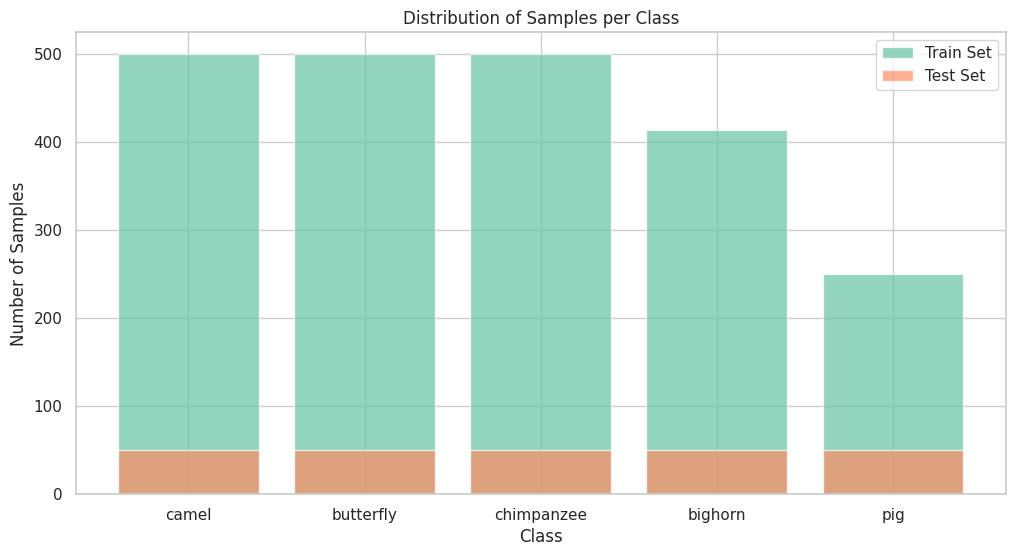

In [ ]:
# Show it using a plot. Is the distribution balanced or unbalanced?
import seaborn as sns

# Set a seaborn style
sns.set(style="whitegrid")

# Define pretty colors
colors = sns.color_palette("Set2")

# Plotting the distribution for training set
plt.figure(figsize=(12, 6))
plt.bar(train_samples_per_class.index, train_samples_per_class.values, color=colors[0], alpha=0.7, label='Train Set')

# Plotting the distribution for test set
plt.bar(test_samples_per_class.index, test_samples_per_class.values, color=colors[1], alpha=0.7, label='Test Set')

plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Distribution of Samples per Class')
plt.legend()
plt.show()

# unbalanced

## Encoding the labels

In [ ]:
encode = preprocessing.LabelEncoder()
encode.fit(train_data['label'])
train_data['label'] = encode.transform(train_data['label'])
encode.fit(test_data['label'])
test_data['label'] = encode.transform(test_data['label'])

print(train_data['label'])
print(test_data['label'])

0       2
1       2
2       2
3       2
4       2
       ..
2159    4
2160    4
2161    4
2162    4
2163    4
Name: label, Length: 2164, dtype: int64
0      2
1      2
2      2
3      2
4      2
      ..
245    4
246    4
247    4
248    4
249    4
Name: label, Length: 250, dtype: int64


In [ ]:
train_data.head()

,p_0,p_1,p_2,p_3,p_4,p_5,p_6,p_7,p_8,p_9,...,p_12279,p_12280,p_12281,p_12282,p_12283,p_12284,p_12285,p_12286,p_12287,label
0,205,197,195,206,202,201,203,202,207,200,...,160,123,94,139,102,75,65,29,3,2
1,172,206,254,172,206,254,171,205,253,171,...,57,36,17,97,76,59,67,46,29,2
2,92,88,85,100,96,93,105,101,98,101,...,46,55,62,38,45,55,36,42,54,2
3,241,241,249,241,241,249,241,242,247,241,...,254,223,177,250,219,173,247,216,170,2
4,104,163,219,105,164,220,106,165,223,108,...,187,144,93,216,173,122,194,151,100,2


## Separating the label column in train and test data for future predection

In [ ]:
x_train = train_data.drop(['label'], axis=1)
y_train = train_data['label']
x_train

,p_0,p_1,p_2,p_3,p_4,p_5,p_6,p_7,p_8,p_9,...,p_12278,p_12279,p_12280,p_12281,p_12282,p_12283,p_12284,p_12285,p_12286,p_12287
0,205,197,195,206,202,201,203,202,207,200,...,87,160,123,94,139,102,75,65,29,3
1,172,206,254,172,206,254,171,205,253,171,...,41,57,36,17,97,76,59,67,46,29
2,92,88,85,100,96,93,105,101,98,101,...,60,46,55,62,38,45,55,36,42,54
3,241,241,249,241,241,249,241,242,247,241,...,177,254,223,177,250,219,173,247,216,170
4,104,163,219,105,164,220,106,165,223,108,...,83,187,144,93,216,173,122,194,151,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2159,245,248,217,205,208,177,183,183,155,198,...,172,196,184,188,163,150,157,165,152,159
2160,98,94,91,87,84,79,83,78,74,92,...,115,148,133,112,142,129,110,140,127,108
2161,82,60,23,100,78,41,112,90,51,82,...,103,112,66,14,141,95,43,154,109,54
2162,12,14,11,23,25,22,45,47,44,37,...,6,6,5,3,94,90,89,169,165,164


In [ ]:
y_train

0       2
1       2
2       2
3       2
4       2
       ..
2159    4
2160    4
2161    4
2162    4
2163    4
Name: label, Length: 2164, dtype: int64

In [ ]:
x_test = test_data.drop(['label'], axis=1)
y_test = test_data['label']
x_test

,p_0,p_1,p_2,p_3,p_4,p_5,p_6,p_7,p_8,p_9,...,p_12278,p_12279,p_12280,p_12281,p_12282,p_12283,p_12284,p_12285,p_12286,p_12287
0,177,194,214,177,194,212,179,194,213,179,...,206,186,188,201,187,185,198,186,184,195
1,251,252,254,249,250,252,247,249,248,247,...,90,182,149,96,177,144,90,165,132,78
2,142,130,114,119,107,91,113,101,85,121,...,63,194,168,117,255,242,232,243,233,241
3,178,210,223,171,203,216,170,202,217,176,...,91,154,136,116,52,34,14,81,63,43
4,170,169,174,169,168,173,168,167,172,167,...,162,183,163,138,173,156,130,197,180,154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,249,254,234,249,254,234,249,254,234,249,...,180,191,188,171,223,220,203,251,248,231
246,0,17,19,0,5,5,2,11,8,8,...,11,0,0,5,8,7,13,0,0,5
247,144,129,100,128,113,84,125,110,81,145,...,37,167,153,140,126,112,99,142,128,115
248,214,231,151,218,237,158,202,220,146,204,...,142,159,172,93,178,190,114,181,193,119


In [ ]:
y_test

0      2
1      2
2      2
3      2
4      2
      ..
245    4
246    4
247    4
248    4
249    4
Name: label, Length: 250, dtype: int64

## Normalization - MinMax

In [ ]:
x_norm_train = preprocessing.minmax_scale(x_train)
x_norm_train = pd.DataFrame(x_norm_train)
x_norm_train

,0,1,2,3,4,5,6,7,8,9,...,12278,12279,12280,12281,12282,12283,12284,12285,12286,12287
0,0.803922,0.772549,0.764706,0.807843,0.792157,0.788235,0.796078,0.792157,0.811765,0.784314,...,0.341176,0.627451,0.482353,0.368627,0.545098,0.400000,0.294118,0.254902,0.113725,0.011765
1,0.674510,0.807843,0.996078,0.674510,0.807843,0.996078,0.670588,0.803922,0.992157,0.670588,...,0.160784,0.223529,0.141176,0.066667,0.380392,0.298039,0.231373,0.262745,0.180392,0.113725
2,0.360784,0.345098,0.333333,0.392157,0.376471,0.364706,0.411765,0.396078,0.384314,0.396078,...,0.235294,0.180392,0.215686,0.243137,0.149020,0.176471,0.215686,0.141176,0.164706,0.211765
3,0.945098,0.945098,0.976471,0.945098,0.945098,0.976471,0.945098,0.949020,0.968627,0.945098,...,0.694118,0.996078,0.874510,0.694118,0.980392,0.858824,0.678431,0.968627,0.847059,0.666667
4,0.407843,0.639216,0.858824,0.411765,0.643137,0.862745,0.415686,0.647059,0.874510,0.423529,...,0.325490,0.733333,0.564706,0.364706,0.847059,0.678431,0.478431,0.760784,0.592157,0.392157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2159,0.960784,0.972549,0.850980,0.803922,0.815686,0.694118,0.717647,0.717647,0.607843,0.776471,...,0.674510,0.768627,0.721569,0.737255,0.639216,0.588235,0.615686,0.647059,0.596078,0.623529
2160,0.384314,0.368627,0.356863,0.341176,0.329412,0.309804,0.325490,0.305882,0.290196,0.360784,...,0.450980,0.580392,0.521569,0.439216,0.556863,0.505882,0.431373,0.549020,0.498039,0.423529
2161,0.321569,0.235294,0.090196,0.392157,0.305882,0.160784,0.439216,0.352941,0.200000,0.321569,...,0.403922,0.439216,0.258824,0.054902,0.552941,0.372549,0.168627,0.603922,0.427451,0.211765
2162,0.047059,0.054902,0.043137,0.090196,0.098039,0.086275,0.176471,0.184314,0.172549,0.145098,...,0.023529,0.023529,0.019608,0.011765,0.368627,0.352941,0.349020,0.662745,0.647059,0.643137


In [ ]:
print("shape of X =", x_norm_train.shape)
print("shape of y =", y_test.shape)

shape of X = (2164, 12288)
shape of y = (250,)


## Logistic Regression

In [ ]:
# Use the logistic regression shown in the last class to classify.
# Report the following results separately for train and test - accuracy, sensitivity, specificity, positive predictive value (PPV), negative predictive value (NPV), the confusion matrix, and the F1 score.
# How can we interpret these results?

# Split the data into training and validation sets (80% training, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(x_norm_train, y_train, test_size=0.2, random_state=100)

# Print the shapes of the resulting sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)

Training set shape: (1731, 12288) (1731,)
Validation set shape: (433, 12288) (433,)


In [ ]:
model = linear_model.LogisticRegression(C=1, fit_intercept=True, solver='lbfgs', max_iter=100)
model = model.fit(X_train, y_train)
y_predict = model.predict(X_val)

acc_train = np.mean(y_train == model.predict(X_train))*100
acc_validation = np.mean(y_val == y_predict)*100
print("Training accuracy (%) =", acc_training)
print("Validation accuracy (%) =", acc_testing)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training accuracy (%) = 98.55574812247256
Validation accuracy (%) = 53.5796766743649


In [ ]:
# Function to print and interpret the metrics with confusion matrix plot
def print_metrics_with_plot(y_true, y_pred, set_name):
    print(f"\nMetrics for {set_name} set:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))

    # # Plot confusion matrix
    # disp = plot_confusion_matrix(X_train, y_true, cmap=plt.cm.Blues)
    # disp.ax_.set_title(f'Confusion Matrix - {set_name} Set')

# # Print and interpret metrics for training set
# print_metrics_with_plot(y_train, y_predict, "Training")

# Print and interpret metrics for test set
print_metrics_with_plot(y_val, y_predict, "Test")


Metrics for Test set:
Accuracy: 0.535796766743649
Classification Report:
               precision    recall  f1-score   support

           0       0.34      0.32      0.33        73
           1       0.77      0.77      0.77       108
           2       0.43      0.56      0.48        99
           3       0.65      0.62      0.64       100
           4       0.26      0.17      0.20        53

    accuracy                           0.54       433
   macro avg       0.49      0.49      0.48       433
weighted avg       0.53      0.54      0.53       433



In [ ]:
# sensitivity, specificity, positive predictive value (PPV), negative predictive value (NPV), the confusion matrix, and the F1 score.
# How can we interpret these results?


from sklearn.metrics import confusion_matrix
from seaborn import heatmap
mat=confusion_matrix(y_predict, y_val)
heatmap(mat , cmap="Pastel1_r", xticklabels=['camel' ,'butterfly' ,'chimpanzee', 'bighorn', 'pig'], yticklabels=['camel' ,'butterfly' ,'chimpanzee', 'bighorn', 'pig'], annot=True)

NameError: ignored